In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [201]:
df=pd.read_csv("datasetw7.csv")

In [202]:
df.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


In [203]:
df.isna().sum().sum()

0

In [204]:
col=df.columns
for cl in col:
    cl_New=cl.replace(" ","_")
    df.rename(columns={cl:cl_New}, inplace=True)
df.columns

Index(['Gender', 'Test_preparation', 'Total_Marks'], dtype='object')

In [205]:
df.dtypes

Gender              object
Test_preparation    object
Total_Marks          int64
dtype: object

# 1. Carry out descriptive analytics on the dataset

In [206]:
pv_df=df.pivot_table(index=["Gender",'Test_preparation'],values="Total_Marks",aggfunc=statistics.median)
pv_df.reset_index(inplace=True)
pv_df.columns=["Gender",'Test_preparation',"Median"]
pv_df

,Gender,Test_preparation,Median
0,female,completed,45.5
1,female,none,27.5
2,male,completed,44.0
3,male,none,24.0


Remarks:
1. Females who completed the test prepation have high median  compared to the rest, they scored better
2. Those who completed the course had better performance

Text(0.5, 1.0, 'student who completed the Test Course better perfomed, less in counts\n')

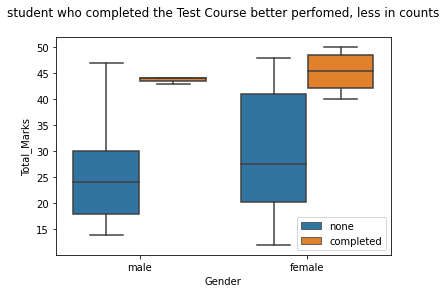

In [225]:
sns.boxplot(data=df,x="Gender",y="Total_Marks",hue="Test_preparation")
plt.legend()
plt.title("student who completed the Test Course better perfomed, less in counts\n")

Remarks:
    No outliers found in the dataset
    students who completed the test course performed better, but very less in count

# 2. Check whether female and male students scored the same marks.

In [208]:
# to get the marks whose frequency >1
df_ref=df["Total_Marks"].value_counts()>1
df_ref.where(df_ref).dropna().index

Int64Index([14, 18, 48, 27, 44, 28, 43, 41], dtype='int64')

In [209]:
# to filter DF for Only those marks
df_Same=df.query('Total_Marks==[14, 18, 48, 27, 44, 28, 43, 41]') 

<AxesSubplot:xlabel='count', ylabel='Total_Marks'>

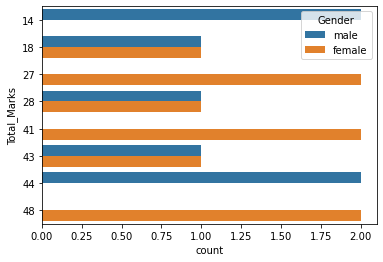

In [210]:
# Count plot with hue as gender
sns.countplot(y='Total_Marks',data=df_Same,hue='Gender')

Remarks:
    From the above Graph, we can see that female and male students scored the same marks(Marks: 18, 28,43 )

# 3. Whether test preparation helps the students?

In [226]:
# Ho=Test preparation has no impact
# Ha=Test preperation helps the students

Significance_level=0.05
print("Significance_level:",str(Significance_level))

# we will go for T tset(one tail) to check whether we need to accept or reject H0, since it has only one direction
df_comp=df[df["Test_preparation"]=="completed"]
df_none=df[df["Test_preparation"]=="none"]

arr_c=df_comp["Total_Marks"].to_numpy()
arr_n=df_none["Total_Marks"].to_numpy()
print("completed_test:",str(arr_c))
print("Not_completed_test:",str(arr_n))

Significance_level: 0.05
completed_test: [40 44 43 48 44 50 43]
Not_completed_test: [14 28 18 48 21 30 12 18 24 23 28 41 13 45 47 36 14 41 27 27 38]


In [219]:
from scipy.stats import ttest_ind

In [224]:
_,p=ttest_ind(arr_c,arr_n)
if p>Significance_level:
    print("Failing to Reject null Hypothesis")
else:
    print("Rejecting null hypothesis")

Rejecting null hypothesis


In [ ]:
#Conclusion:
    # Based on the testing carried out in provided data we are rejecting the null hypothesis
    # We can conclude that Test preperation helps the students to achieve good marks